In [1]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt

/var/folders/n9/ypwpwtxs29dgh8ycr8xkgcp0n7tvkv/T/ipykernel_43720/794816463.py:206: RuntimeWarning:

divide by zero encountered in divide

/var/folders/n9/ypwpwtxs29dgh8ycr8xkgcp0n7tvkv/T/ipykernel_43720/794816463.py:207: RuntimeWarning:

divide by zero encountered in divide

/var/folders/n9/ypwpwtxs29dgh8ycr8xkgcp0n7tvkv/T/ipykernel_43720/794816463.py:207: RuntimeWarning:

invalid value encountered in divide



2.358020591165726e-19
1.6605778811026238e-11
2.3580205911657256e-14
1.6605778811026237e-06


AssertionError: 

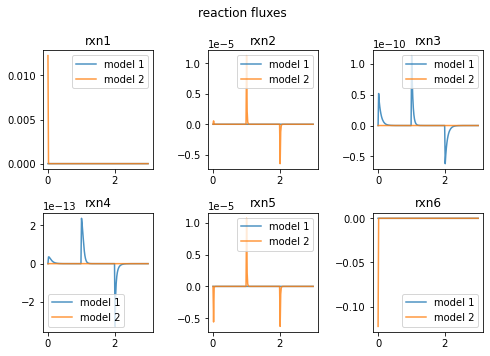

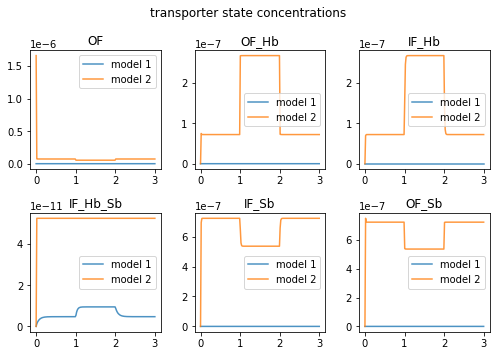

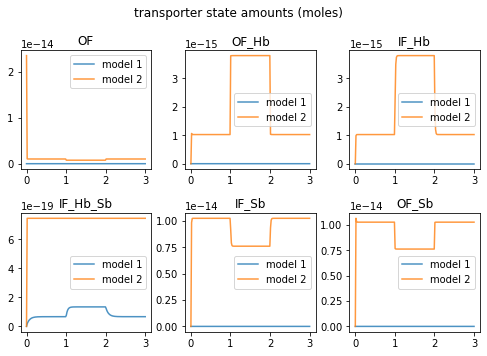

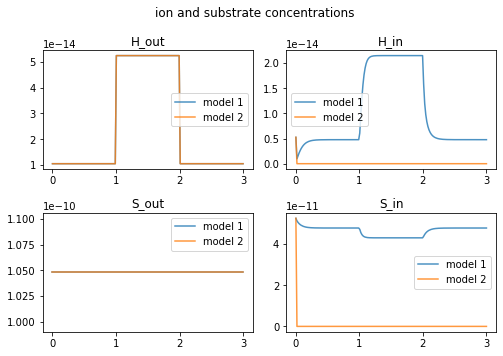

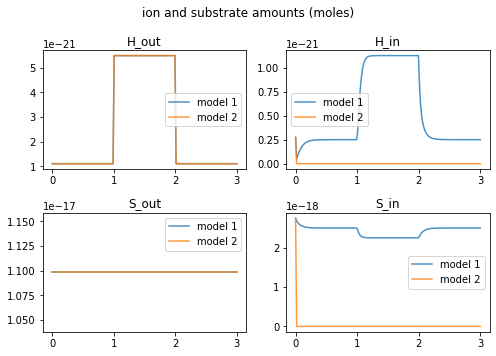

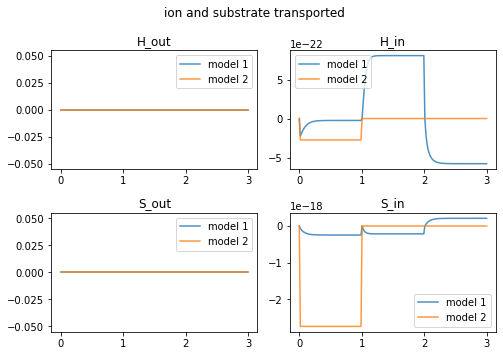

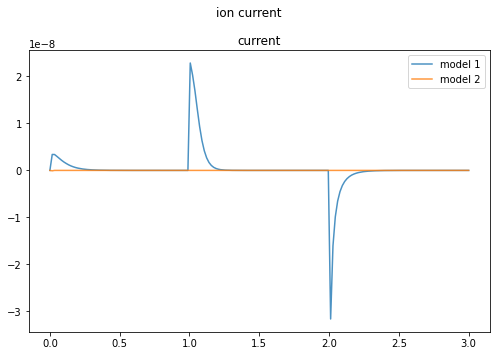

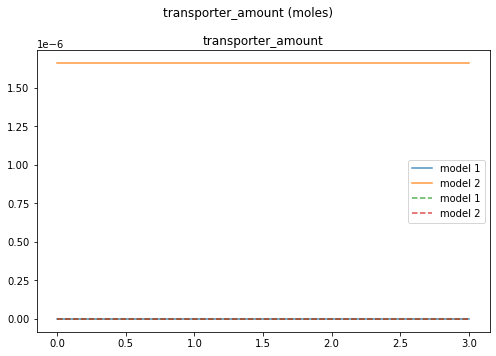

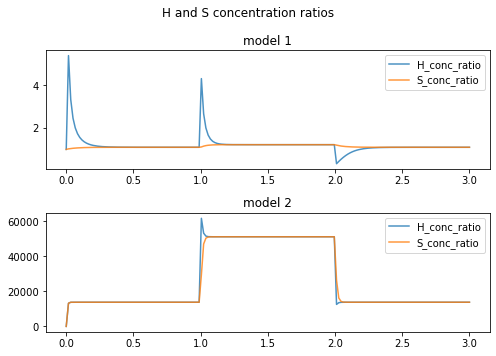

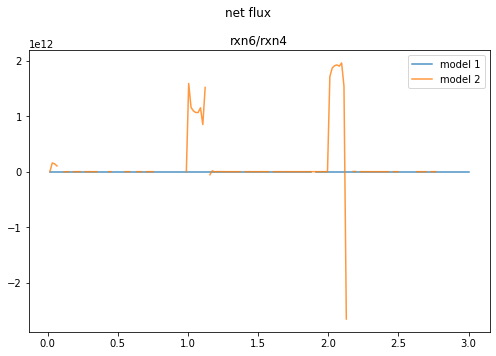

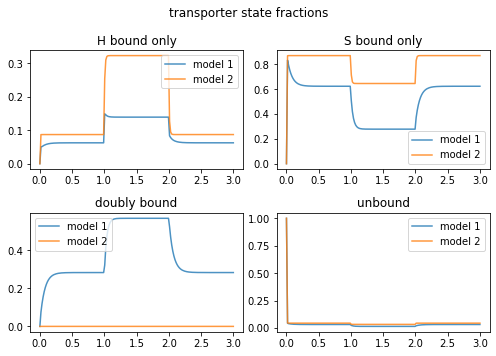

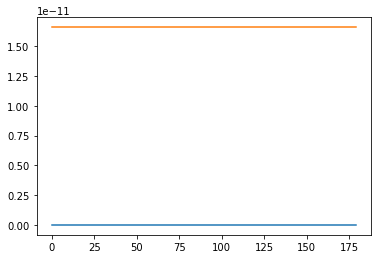

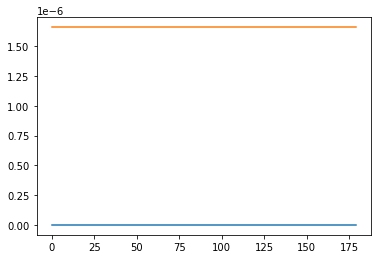

In [11]:
def print_model_info(rr_model, attribute_list, label=''):
    print(label)
    for attribute in attribute_list:
        print(f'{attribute}: {getattr(rr_model, attribute)}')
    print('\n')

def simulate_rr_model(m):
    selections = [
        'time', 
        'rxn1', 
        'rxn2', 
        'rxn3', 
        'rxn4', 
        'rxn5', 
        'rxn6', 
        'current', 
        'OF', 
        'OF_Hb',
        'IF_Hb',
        'IF_Hb_Sb', 
        'IF_Sb', 
        'OF_Sb',
        'H_out',
        'H_in', 
        'S_out',
        'S_in', 
        'transporter_amount', 
        'H_conc_ratio', 
        'S_conc_ratio'
    ]
    m.resetToOrigin()
    m.H_act = 5e-7  # plot values
    m.integrator.absolute_tolerance = 1e-22
    m.integrator.relative_tolerance = 1e-12
    results = m.simulate(0,3,180, selections=selections)
    return results


def compare_two_models(model1, model2):

    results1 = simulate_rr_model(model1)
    results2 = simulate_rr_model(model2)

    v_out, v_m, v_in = model1.v_out, model1.v_m, model1.v_in

    # plot reactions
    labels = ['rxn1', 'rxn2', 'rxn3', 'rxn4', 'rxn5', 'rxn6']
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7, 5))
    plt.suptitle('reaction fluxes')
    for i, ax in enumerate(axes.flat):
        ax.set_title(f'{labels[i]}')
        ax.plot(results1['time'], results1[labels[i]], label='model 1', alpha=0.8)
        ax.plot(results2['time'], results2[labels[i]], label='model 2', alpha=0.8)
        ax.legend()
    plt.tight_layout()

    # plot transporter concentrations
    labels = ['OF', 'OF_Hb', 'IF_Hb', 'IF_Hb_Sb', 'IF_Sb', 'OF_Sb']
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7, 5))
    plt.suptitle('transporter state concentrations')
    for i, ax in enumerate(axes.flat):
        ax.set_title(f'{labels[i]}')
        ax.plot(results1['time'], results1[labels[i]], label='model 1', alpha=0.8)
        ax.plot(results2['time'], results2[labels[i]], label='model 2', alpha=0.8)
        ax.legend()
    plt.tight_layout()

    # plot transporter amount (moles)
    labels = ['OF', 'OF_Hb', 'IF_Hb', 'IF_Hb_Sb', 'IF_Sb', 'OF_Sb']
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7, 5))
    plt.suptitle('transporter state amounts (moles)')
    for i, ax in enumerate(axes.flat):
        ax.set_title(f'{labels[i]}')
        ax.plot(results1['time'], results1[labels[i]]*v_m, label='model 1', alpha=0.8)
        ax.plot(results2['time'], results2[labels[i]]*v_m, label='model 2', alpha=0.8)
        ax.legend()
    plt.tight_layout()

    # plot chemical species concentrations
    labels = ['H_out', 'H_in', 'S_out', 'S_in']
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
    plt.suptitle('ion and substrate concentrations')
    for i, ax in enumerate(axes.flat):
        ax.set_title(f'{labels[i]}')
        ax.plot(results1['time'], results1[labels[i]], label='model 1', alpha=0.8)
        ax.plot(results2['time'], results2[labels[i]], label='model 2', alpha=0.8)
        ax.legend()
    plt.tight_layout()

    # plot chemical species amounts in moles
    labels = ['H_out', 'H_in', 'S_out', 'S_in']
    volumes = [v_out, v_in, v_out, v_in]
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
    plt.suptitle('ion and substrate amounts (moles)')
    for i, ax in enumerate(axes.flat):
        ax.set_title(f'{labels[i]}')
        ax.plot(results1['time'], results1[labels[i]]*volumes[i], label='model 1', alpha=0.8)
        ax.plot(results2['time'], results2[labels[i]]*volumes[i], label='model 2', alpha=0.8)
        ax.legend()
    plt.tight_layout()

    # plot chemical species amounts transported
    labels = ['H_out', 'H_in', 'S_out', 'S_in' ]
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))

    ## model 1
    H_out_0_m1_s1 = results1['H_out'][0]*v_out
    S_out_0_m1_s1 = results1['S_out'][0]*v_out
    H_in_0_m1_s1 = results1['H_in'][0]*v_in
    S_in_0_m1_s1 = results1['S_in'][0]*v_in

    H_out_0_m1_s2 = results1['H_out'][60]*v_out
    S_out_0_m1_s2 = results1['S_out'][60]*v_out
    H_in_0_m1_s2 = results1['H_in'][60]*v_in
    S_in_0_m1_s2 = results1['S_in'][60]*v_in

    H_out_0_m1_s3 = results1['H_out'][120]*v_out
    S_out_0_m1_s3 = results1['S_out'][120]*v_out
    H_in_0_m1_s3 = results1['H_in'][120]*v_in
    S_in_0_m1_s3 = results1['S_in'][120]*v_in

    H_out_m1 = np.hstack([(results1['H_out'][:60]*v_out- H_out_0_m1_s1),(results1['H_out'][60:120]*v_out- H_out_0_m1_s2),(results1['H_out'][120:]*v_out- H_out_0_m1_s3)])
    S_in_m1 = np.hstack([(results1['S_in'][:60]*v_in- S_in_0_m1_s1),(results1['S_in'][60:120]*v_in- S_in_0_m1_s2),(results1['S_in'][120:]*v_in- S_in_0_m1_s3)])
    H_in_m1 = np.hstack([(results1['H_in'][:60]*v_in- H_in_0_m1_s1),(results1['H_in'][60:120]*v_in- H_in_0_m1_s2),(results1['H_in'][120:]*v_in- H_in_0_m1_s3)])
    S_out_m1 = np.hstack([(results1['S_out'][:60]*v_out- S_out_0_m1_s1),(results1['S_out'][60:120]*v_out- S_out_0_m1_s2),(results1['S_out'][120:]*v_out- S_out_0_m1_s3)])

    ## model 2

    H_out_0_m2_s1 = results2['H_out'][0]*v_out
    S_out_0_m2_s1 = results2['S_out'][0]*v_out
    H_in_0_m2_s1 = results2['H_in'][0]*v_in
    S_in_0_m2_s1 = results2['S_in'][0]*v_in

    H_out_0_m2_s2 = results2['H_out'][60]*v_out
    S_out_0_m2_s2 = results2['S_out'][60]*v_out
    H_in_0_m2_s2 = results2['H_in'][60]*v_in
    S_in_0_m2_s2 = results2['S_in'][60]*v_in

    H_out_0_m2_s3 = results2['H_out'][120]*v_out
    S_out_0_m2_s3 = results2['S_out'][120]*v_out
    H_in_0_m2_s3 = results2['H_in'][120]*v_in
    S_in_0_m2_s3 = results2['S_in'][120]*v_in

    H_out_m2 = np.hstack([(results2['H_out'][:60]*v_out- H_out_0_m2_s1),(results2['H_out'][60:120]*v_out- H_out_0_m2_s2),(results2['H_out'][120:]*v_out- H_out_0_m2_s3)])
    S_in_m2 = np.hstack([(results2['S_in'][:60]*v_in- S_in_0_m2_s1),(results2['S_in'][60:120]*v_in- S_in_0_m2_s2),(results2['S_in'][120:]*v_in- S_in_0_m2_s3)])
    H_in_m2 = np.hstack([(results2['H_in'][:60]*v_in- H_in_0_m2_s1),(results2['H_in'][60:120]*v_in- H_in_0_m2_s2),(results2['H_in'][120:]*v_in- H_in_0_m2_s3)])
    S_out_m2 = np.hstack([(results2['S_out'][:60]*v_out- S_out_0_m2_s1),(results2['S_out'][60:120]*v_out- S_out_0_m2_s2),(results2['S_out'][120:]*v_out- S_out_0_m2_s3)])

    D_tmp = [(H_out_m1, H_out_m2), (H_in_m1, H_in_m2), (S_out_m1, S_out_m2), (S_in_m1, S_in_m2)]

    plt.suptitle('ion and substrate transported')
    for i, ax in enumerate(axes.flat):
        ax.set_title(f'{labels[i]}')
        ax.plot(results1['time'], D_tmp[i][0], label='model 1', alpha=0.8)
        ax.plot(results2['time'], D_tmp[i][1], label='model 2', alpha=0.8)
        ax.legend()
    plt.tight_layout()   


    # plot current
    labels = ['current']
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
    plt.suptitle('ion current')
    ax.set_title(f'{labels[0]}')
    ax.plot(results1['time'], results1[labels[0]], label='model 1', alpha=0.8)
    ax.plot(results2['time'], results2[labels[0]], label='model 2', alpha=0.8)
    ax.legend()
    plt.tight_layout()

    # plot transporter amount
    labels = ['transporter_amount']
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
    plt.suptitle('transporter_amount (moles)')
    ax.set_title(f'{labels[0]}')
    transporter_amount_m1 = (results1['OF']+results1['OF_Hb']+results1['IF_Hb']+results1['IF_Hb_Sb']+results1['IF_Sb']+results1['OF_Sb'])*v_m
    transporter_amount_m2 = (results2['OF']+results2['OF_Hb']+results2['IF_Hb']+results2['IF_Hb_Sb']+results2['IF_Sb']+results2['OF_Sb'])*v_m

    ax.plot(results1['time'], results1[labels[0]], label='model 1', alpha=0.8)
    ax.plot(results2['time'], results2[labels[0]], label='model 2', alpha=0.8)

    ax.plot(results1['time'], transporter_amount_m1, '--', label='model 1', alpha=0.8)
    ax.plot(results2['time'], transporter_amount_m2, '--', label='model 2', alpha=0.8)
    ax.legend()
    plt.tight_layout()

    # plot H and S concentration ratios
    labels = ['H_conc_ratio', 'S_conc_ratio']
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 5))
    plt.suptitle('H and S concentration ratios')
    axes[0].set_title(f'model 1')
    axes[0].plot(results1['time'], results1['H_conc_ratio'], label='H_conc_ratio', alpha=0.8)
    axes[0].plot(results1['time'], results1['S_conc_ratio'], label='S_conc_ratio', alpha=0.8)
    axes[0].legend()
    axes[1].set_title(f'model 2')
    axes[1].plot(results2['time'], results2['H_conc_ratio'], label='H_conc_ratio', alpha=0.8)
    axes[1].plot(results2['time'], results2['S_conc_ratio'], label='S_conc_ratio', alpha=0.8)
    axes[1].legend()
    plt.tight_layout()


    # plot H and S concentration ratios
    labels = ['rxn6/rxn4']
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
    plt.suptitle('net flux')
    ax.set_title(f'{labels[0]}')
    ax.plot(results1['time'], results1['rxn6']/results1['rxn4'], label='model 1', alpha=0.8)
    ax.plot(results2['time'], results2['rxn6']/results2['rxn4'], label='model 2', alpha=0.8)
    ax.legend()
    plt.tight_layout()

    # plot fraction bound
    labels = ['H bound only', 'S bound only', 'doubly bound', 'unbound']
    #transporter_amount_m1 = (results1['OF'] + results1['OF_Hb'] + results1['OF_Hb_Sb'] + results1['OF_Sb'] + results1['IF_Sb'])*v_m
    frac_H_bound_transporters_m1 = (results1['OF_Hb'] + results1['IF_Hb'])*v_m/transporter_amount_m1
    frac_S_bound_transporters_m1 = (results1['IF_Sb']+ results1['OF_Sb'])*v_m/transporter_amount_m1
    frac_2bound_transporters_m1 = (results1['IF_Hb_Sb'])*v_m / transporter_amount_m1
    frac_unbound_transporters_m1 = (results1['OF'])*v_m / transporter_amount_m1

    #transporter_amount_m2 = (results2['OF']+ results2['OF_Hb'] + results2['OF_Hb_Sb'] + results2['OF_Sb']+results2['IF_Sb'])*v_m
    frac_H_bound_transporters_m2 = (results2['OF_Hb'] + results2['IF_Hb'] )*v_m/transporter_amount_m2
    frac_S_bound_transporters_m2 = (results2['IF_Sb']+ results2['OF_Sb'])*v_m/transporter_amount_m2
    frac_2bound_transporters_m2 = (results2['IF_Hb_Sb'])*v_m / transporter_amount_m2
    frac_unbound_transporters_m2 = (results2['OF'])*v_m / transporter_amount_m2

    D_tmp = [(frac_H_bound_transporters_m1,frac_H_bound_transporters_m2), (frac_S_bound_transporters_m1,frac_S_bound_transporters_m2), 
             (frac_2bound_transporters_m1,frac_2bound_transporters_m2), (frac_unbound_transporters_m1,frac_unbound_transporters_m2)]

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
    plt.suptitle('transporter state fractions')
    for i, ax in enumerate(axes.flat):
        ax.set_title(f'{labels[i]}')
        ax.plot(results1['time'], D_tmp[i][0], label='model 1', alpha=0.8)
        ax.plot(results2['time'], D_tmp[i][1], label='model 2', alpha=0.8)
        ax.legend()
    plt.tight_layout()   

    plt.figure()
    plt.plot(transporter_amount_m1)
    plt.plot(results1['transporter_amount'])
    plt.figure()
    plt.plot(transporter_amount_m2)
    plt.plot(results2['transporter_amount'])
    print(transporter_amount_m1[0])
    print(results1['transporter_amount'][0])
    print(transporter_amount_m2[0])
    print(results2['transporter_amount'][0])

    assert(np.all((frac_H_bound_transporters_m1+frac_S_bound_transporters_m1+frac_2bound_transporters_m1+frac_unbound_transporters_m1))==1.0)
    assert(np.all((frac_H_bound_transporters_m2+frac_S_bound_transporters_m2+frac_2bound_transporters_m2+frac_unbound_transporters_m2))==1.0)

    assert(np.array_equiv(transporter_amount_m1, results1['transporter_amount']))
    assert(np.array_equiv(transporter_amount_m2, results2['transporter_amount']))


def run_parameter_sweep(model, p_name, p_val_list):
    m = model
    selections = [
        'time', 
        'rxn1', 
        'rxn2', 
        'rxn3', 
        'rxn4', 
        'rxn5', 
        'rxn6', 
        'current', 
        'OF', 
        'OF_Hb',
        'IF_Hb',
        'IF_Hb_Sb', 
        'IF_Sb', 
        'OF_Sb',
        'H_out',
        'H_in', 
        'S_out',
        'S_in', 
        'transporter_amount', 
        'H_conc_ratio', 
        'S_conc_ratio'
    ]

    results_list = []
    for p_val in p_val_list:

        m.resetToOrigin()
        m.H_act = 5e-7  # plot values
        m.integrator.absolute_tolerance = 1e-22
        m.integrator.relative_tolerance = 1e-12
        setattr(m,p_name,p_val)
        setattr(m,'OF', getattr(m,'molar_concentration_transporters'))
        results = m.simulate(0,3,180, selections=selections)
        results_list.append(results)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
    ax.set_title(f'parameter sweep: {p_name}')
    ax.set_xlabel(f'time')
    ax.set_ylabel(f'current')
    for i, r in enumerate(results_list):
        ax.plot(r['time'], r['current'], label=[f'{int(p_val_list[i]):.2E}'])
    ax.legend()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
    ax.set_title(f'parameter sweep: peak absolute current vs {p_name}')
    ax.set_xlabel(f'time')
    ax.set_ylabel(f'current')
    x = np.array(p_val_list)
    y = np.array([np.max(abs(r['current'][60:])) for r in results_list])
    print(y)
    ax.plot(x, y)
    ax.set_xscale('log')

    return results_list


model1 = te.loada('/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/scratch/antiporter_12D_model_3c.txt')
model2 = te.loada('/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/scratch/antiporter_12D_model_3c_0_1T.txt')

compare_two_models(model1, model2)


attribute_list = ['n_transporters', 'moles_transporters', 'molar_concentration_transporters', 'OF']
print_model_info(model1, attribute_list, 'model1')
print_model_info(model2, attribute_list, 'model2')

_ = run_parameter_sweep(model1, 'n_transporters', np.logspace(8,18, num=11))



In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, glob, os, seaborn as sns


p_labels = [
    r'$\mathrm{log_{10}(k_1^+)}$',
    r'$\mathrm{log_{10}(k_1^-)}$',
    r'$\mathrm{log_{10}(k_2^+)}$',
    r'$\mathrm{log_{10}(k_2^-)}$',
    r'$\mathrm{log_{10}(k_3^+)}$',
    r'$\mathrm{log_{10}(k_3^-)}$',
    r'$\mathrm{log_{10}(k_4^+)}$',
    r'$\mathrm{log_{10}(k_4^-)}$',
    r'$\mathrm{log_{10}(k_5^+)}$',
    r'$\mathrm{log_{10}(k_5^-)}$',
    r'$\mathrm{log_{10}(k_6^+)}$',
    r'$\mathrm{log_{10}(k_7^+)}$',
    r'$\mathrm{log_{10}(k_8^+)}$',
    r'$\mathrm{log_{10}(k_8^-)}$',
    r'$\mathrm{log_{10}(\sigma_{noise})}$',
]

# parameter info for model
p_info = [   
        ["log10_k1_f",6,12,7.],
        ["log10_k1_r",-1,5,0.],

        ["log10_k2_f",-2,4,2.],
        ["log10_k2_r",-2,4,2.],
        ["log10_k3_f",3,9,7.],
        ["log10_k3_r",-1,5,3.],
        ["log10_k4_f",-1,5,3.],
        ["log10_k4_r",6,12,10.],
        ["log10_k5_f",-2,4,2.],
        ["log10_k5_r",-2,4,2.],

        ["log10_k6_f",-1,5,0],

        ["log10_k7_f", 6, 12, 10], 
        ["log10_k8_f", -1, 5, 3], 
        ["log10_k8_r", 3, 9, 7], 

        ["log_sigma", -11.301029995663981, -10.301029995663981, -11],
]

p_true = [p_i[3] for p_i in p_info]
#p_labels = [p[0] for p in p_info]
p_bounds = [(p[1]*0.99, p[2]*1.01) for p in p_info]


# load sample data files
data_dir = '/Users/georgeau/Desktop/research_data/2023_2_14/v3/'
data_files = glob.glob(os.path.join(data_dir, '**/samples*.csv'),recursive=True)
dfs = []
for file in data_files:
    dfs.append(pd.read_csv(file, names=p_labels, skiprows=0))
print(f"using {len(dfs)} dataframes")
df_concat = pd.concat(dfs)    
df_concat.columns = p_labels
# plot histograms

labels=['replica 1', 'replica 2', 'replica 3', 'replica 4', 'replica 5']
n_bins = 100
fig, axs = plt.subplots(5,3, figsize=(50,50))
p_n_list = []
b_n_list = []
for i, ax in enumerate(axs.flat):
    n_list = []
    for j, df_tmp in enumerate(dfs):       
        data_tmp = df_tmp.iloc[:,i]
        #n,b,p = ax.hist(data_tmp, density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), histtype='step',linewidth=5, label=labels[j])
        ax.set_xlim(p_bounds[i][0],p_bounds[i][1])
        sns.kdeplot(data_tmp, ax=ax, linewidth=5, label=labels[j])
        if i in [0,3,6,9,12]:
            ax.set_ylabel(r'$\mathrm{Density}$', fontsize=78)
        else:
            ax.set_ylabel(None)
        
        #n_list.append(n)
    #ax.hist(df_concat.iloc[:,i], density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=1.0, color='black', histtype='step', label='agg')
    ax.legend(prop={'size': 57})
    ax.set_xlabel(p_labels[i], fontsize=78)
    #ax.set_title(f'{p_labels[i]}')
    #ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
    ax.axvline(p_true[i], 0,1, ls='--', color='k', linewidth=5)
    #p_n_list.append(n_list)
    #b_n_list.append(b)
#plt.suptitle(f"1D parameter distributions")

for axis in ['top','bottom','left','right']:
    for ax in axs.flat:
        ax.spines[axis].set_linewidth(7)
        ax.spines[axis].set_linewidth(7)
for ax in axs.flat:   
    ax.tick_params(width=7)
    ax.tick_params(axis='both', which='major', labelsize=68)
    ax.tick_params(axis='both', which='minor', labelsize=42)
plt.suptitle('Parameter distributions for a two-cycle model', fontsize=80)



plt.tight_layout()    


In [ ]:
# for poster
model1 = te.loada('/Users/georgeau/Desktop/GitHub/BPS2023/transporter_model/antiporter_12D_model_3c_0_1T.txt')
results1 = simulate_rr_model(model1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 8))
#plt.suptitle('ion current (nA)')
t = np.linspace(0,3,180)
y = results1['current'] + np.random.normal(0, 1e-10, np.size(results1['current']))
ax.plot(t, y, linewidth=10, color='black')
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])
ax.axis('off')
plt.tight_layout()
plt.savefig('test.png', transparent=True)


In [ ]:
value = np.random.normal(loc=5,scale=3,size=1000000)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
ax.hist(value, bins=100, density=True, linewidth=5, alpha=0.75)
ax.hist(value, bins=100, density=True, histtype='step', color='black', linewidth=5)
ax.axis('off')
plt.tight_layout()
plt.savefig('test.png', transparent=True)


In [ ]:
from pathlib import Path
import seaborn as sns
import matplotlib

matplotlib.rcParams.update({'font.size': 56})

datafile = '/Users/georgeau/Desktop/bad_sampling/run_d20230217_125245_nw100_nd12_as1000_g0.8_ess0.9_r4/samples_r4.csv'
datafile2 = '/Users/georgeau/Desktop/bad_sampling/run_d20230217_125245_nw100_nd12_as1000_g0.8_ess0.9_r5/samples_r5.csv'
datafile3 = '/Users/georgeau/Desktop/bad_sampling/run_d20230217_125323_nw100_nd12_as1000_g0.8_ess0.9_r1/samples_r1.csv'
datafile_list = [datafile, datafile2, datafile3]
labels = ['replica 1', 'replica 2', 'replica 3']

datafile = '/Users/georgeau/Desktop/GitHub/BPS2023/plots/samples_12D_r42_nom.csv'
datafile2 = '/Users/georgeau/Desktop/GitHub/BPS2023/plots/samples_12D_r43_nom.csv'
datafile3 = '/Users/georgeau/Desktop/GitHub/BPS2023/plots/samples_12D_r44_nom.csv'
datafile_list2 = [datafile, datafile2, datafile3]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 20))

for i, datafile in enumerate(datafile_list):
    fname = Path(datafile).stem
    data = np.transpose(np.genfromtxt(datafile, delimiter=','))
    #axes[0].set_title(f'poor sampling')
    axes[0].set_title('poorly sampled', fontsize=84)
    axes[0].set_xlim(3,9.5)
    axes[0].set_xlabel(r'$\mathrm{log}_{10} ( \mathrm{k}^+_3)$', fontsize=78)
    axes[0].set_ylabel(r'$\mathrm{Density}$', fontsize=78)
    sns.kdeplot(data=data[4], ax=axes[0], linewidth=7, label=labels[i])
    #axes[0].hist(data[4], bins=100, range=(3,9), density=True, linewidth=5, alpha=0.75, histtype='step')
    axes[0].legend(prop={'size': 57})
    axes[0].axvline(7, 0,1, ls='--', color='black', linewidth=3)

for i, datafile in enumerate(datafile_list2):
    fname = Path(datafile).stem
    data = np.transpose(np.genfromtxt(datafile, delimiter=','))
    #axes[0].set_title(f'poor sampling')
    #axes[1].hist(data[4], bins=100, range=(3,9), density=True, linewidth=5, alpha=0.75, histtype='step')

    axes[1].set_title('better sampled', fontsize=84)
    axes[1].set_xlabel(r'$\mathrm{log}_{10} ( \mathrm{k}^+_3)$', fontsize=78)
    axes[1].set_xlim(3,9.5)
    sns.kdeplot(data=data[4], ax=axes[1], linewidth=7, label=labels[i])
    axes[1].set_ylabel(r'', fontsize=68)
    axes[1].legend(prop={'size': 57})
    axes[1].axvline(7, 0,1, ls='--', color='black', linewidth=3)

for axis in ['top','bottom','left','right']:
    axes[0].spines[axis].set_linewidth(7)
    axes[1].spines[axis].set_linewidth(7)
axes[0].tick_params(width=7)
axes[1].tick_params(width=7)
axes[0].tick_params(axis='both', which='major', labelsize=68)
axes[0].tick_params(axis='both', which='minor', labelsize=42)
axes[1].tick_params(axis='both', which='major', labelsize=68)
axes[1].tick_params(axis='both', which='minor', labelsize=42)





plt.tight_layout()
plt.savefig(f'../test.png', transparent=False)

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, glob, os, seaborn as sns


p_labels = [
    r'$\mathrm{log_{10}(k_1^+)}$',
    r'$\mathrm{log_{10}(k_1^-)}$',
    r'$\mathrm{log_{10}(k_2^+)}$',
    r'$\mathrm{log_{10}(k_2^-)}$',
    r'$\mathrm{log_{10}(k_3^+)}$',
    r'$\mathrm{log_{10}(k_3^-)}$',
    r'$\mathrm{log_{10}(k_4^+)}$',
    r'$\mathrm{log_{10}(k_4^-)}$',
    r'$\mathrm{log_{10}(k_5^+)}$',
    r'$\mathrm{log_{10}(k_5^-)}$',
    r'$\mathrm{log_{10}(k_6^+)}$',
    r'$\mathrm{log_{10}(k_7^+)}$',
    r'$\mathrm{log_{10}(k_8^+)}$',
    r'$\mathrm{log_{10}(k_8^-)}$',
    r'$\mathrm{log_{10}(\sigma_{noise})}$',
]

# parameter info for model
p_info = [   
        ["log10_k1_f",6,12,7.],
        ["log10_k1_r",-1,5,0.],

        ["log10_k2_f",-2,4,2.],
        ["log10_k2_r",-2,4,2.],
        ["log10_k3_f",3,9,7.],
        ["log10_k3_r",-1,5,3.],
        ["log10_k4_f",-1,5,3.],
        ["log10_k4_r",6,12,10.],
        ["log10_k5_f",-2,4,2.],
        ["log10_k5_r",-2,4,2.],

        ["log10_k6_f",-1,5,0],

        ["log10_k7_f", 6, 12, 10], 
        ["log10_k8_f", -1, 5, 3], 
        ["log10_k8_r", 3, 9, 7], 

        ["log10_sigma",np.log10(5e-14), np.log10(5e-13), -13],
]
p_true = [p_i[3] for p_i in p_info]
#p_labels = [p[0] for p in p_info]
p_bounds = [(p[1]*0.99, p[2]*1.01) for p in p_info]


# load sample data files
data_dir = '/Users/georgeau/Desktop/research_data/2022_10_10/c2'
data_files = glob.glob(os.path.join(data_dir, '**/samples*.csv'),recursive=True)
dfs = []
for file in data_files:
    dfs.append(pd.read_csv(file, names=p_labels, skiprows=0))
print(f"using {len(dfs)} dataframes")
df_concat = pd.concat(dfs)    
df_concat.columns = p_labels
# plot histograms

labels=['replica 1', 'replica 2', 'replica 3', 'replica 4']
n_bins = 100
fig, axs = plt.subplots(5,3, figsize=(50,50))
p_n_list = []
b_n_list = []
for i, ax in enumerate(axs.flat):
    n_list = []
    for j, df_tmp in enumerate(dfs):       
        data_tmp = df_tmp.iloc[:,i]
        #n,b,p = ax.hist(data_tmp, density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), histtype='step')
        ax.set_xlim(p_bounds[i][0],p_bounds[i][1])
        sns.kdeplot(data_tmp, ax=ax, linewidth=5, label=labels[j])
        if i in [0,3,6,9,12]:
            ax.set_ylabel(r'$\mathrm{Density}$', fontsize=78)
        else:
            ax.set_ylabel(None)
        
        #n_list.append(n)
    #ax.hist(df_concat.iloc[:,i], density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=1.0, color='black', histtype='step', label='agg')
    ax.legend(prop={'size': 57})
    ax.set_xlabel(p_labels[i], fontsize=78)
    #ax.set_title(f'{p_labels[i]}')
    #ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
    ax.axvline(p_true[i], 0,1, ls='--', color='k', linewidth=5)
    #p_n_list.append(n_list)
    #b_n_list.append(b)
#plt.suptitle(f"1D parameter distributions")

for axis in ['top','bottom','left','right']:
    for ax in axs.flat:
        ax.spines[axis].set_linewidth(7)
        ax.spines[axis].set_linewidth(7)
for ax in axs.flat:   
    ax.tick_params(width=7)
    ax.tick_params(axis='both', which='major', labelsize=68)
    ax.tick_params(axis='both', which='minor', labelsize=42)
plt.suptitle('Parameter distributions for a two-cycle model', fontsize=80)



plt.tight_layout()    




Text(0.5, 0, 'n processes (6 = hardware max)')

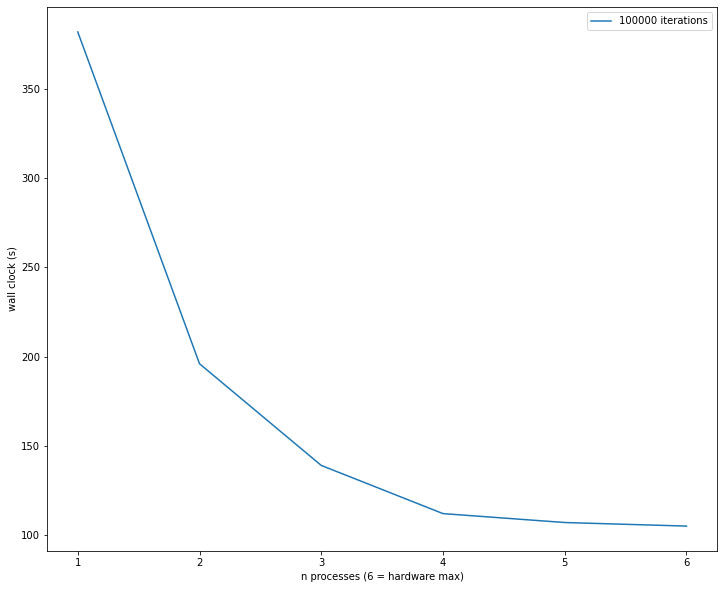

In [19]:




n_trials = 1e5
n_processes = [i for i in range(1,7)]
wall_clock = [382, 196, 139, 112, 107, 105]


plt.figure(figsize=(12,10))
plt.plot(n_processes, wall_clock, label=f'{int(n_trials)} iterations')
plt.legend()
plt.ylabel('wall clock (s)')
plt.xlabel('n processes (6 = hardware max)')

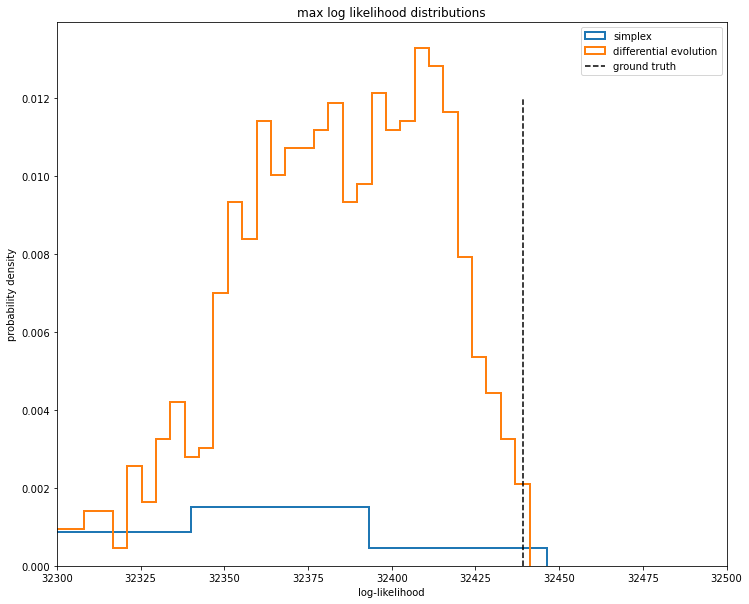

In [18]:
# plot max likelihood for 12D models
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt

ref_logl  = 32439.12625808616
fnames_logl = ['max_logl_list.csv', 'max_logl_list_DE.csv', 'max_logl_list_DE2.csv']
fnames_params = ['param_list.csv', 'param_list_DE.csv', 'param_list_DE2.csv']

logl_list = []
params_list = []

for run_data in zip(fnames_logl, fnames_params):
    logl_list.append(np.loadtxt(run_data[0], delimiter=','))
    params_list.append(np.transpose(np.loadtxt(run_data[1], delimiter=',')))


plt.figure(figsize=(12,10))
plt.title('max log likelihood distributions')
plt.ylabel('probability density')
plt.xlabel('log-likelihood')
plt.hist(logl_list[0], density=True, bins=100, histtype='step', label='simplex', lw=2)
plt.hist(logl_list[2], density=True, bins=100, histtype='step', label='differential evolution', lw=2)
plt.vlines(ref_logl, 0, 0.012, color='black', ls='--', label='ground truth')
plt.legend()
plt.xlim(32300,32500)
plt.show()





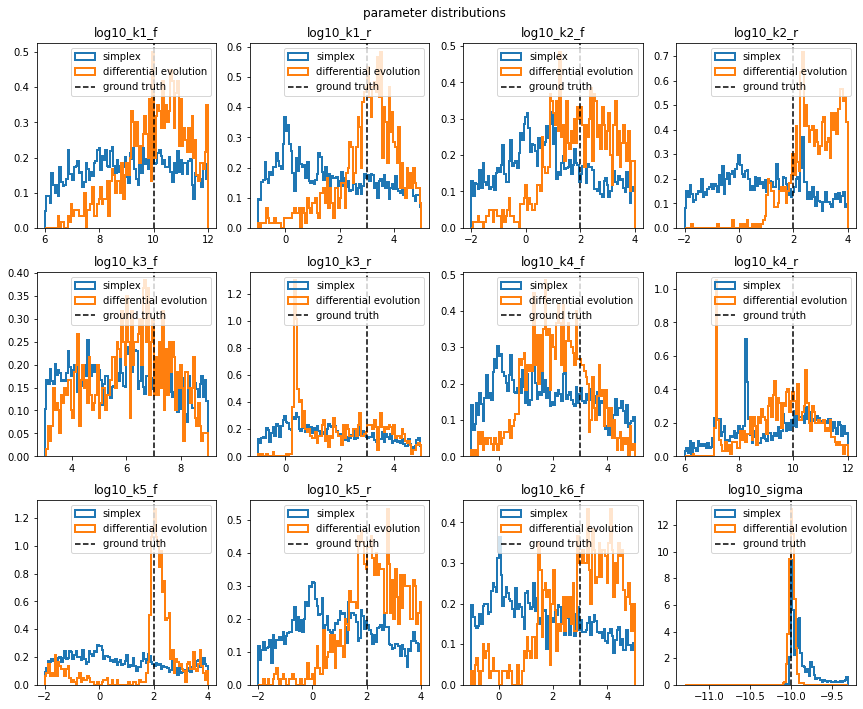

In [21]:
# plot 1D parameter distributions
p_list = [
    ["log10_k1_f", 6, 12, 10], 
    ["log10_k1_r", -1, 5, 3], 
    ["log10_k2_f", -2, 4, 2], 
    ["log10_k2_r", -2, 4, 2], 
    ["log10_k3_f", 3, 9, 7], 
    ["log10_k3_r", -1, 5, 3], 
    ["log10_k4_f", -1, 5, 3], 
    ["log10_k4_r", 6, 12, 10], 
    ["log10_k5_f", -2, 4, 2], 
    ["log10_k5_r", -2, 4, 2], 
    ["log10_k6_f", -1, 5, 3], 
    ["log10_sigma", -11.301029995663981, -9.301029995663981, -10]
]
p_ref = [p[3] for p in p_list]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
plt.suptitle('parameter distributions')
for i, ax in enumerate(axes.flat):
    ax.set_title(f'{p_list[i][0]}')
    ax.hist(params_list[0][i], density=True, bins=100, range=(p_list[i][1],p_list[i][2]), histtype='step', label='simplex', lw=2)
    ax.hist(params_list[2][i], density=True, bins=100, range=(p_list[i][1],p_list[i][2]), histtype='step', label='differential evolution', lw=2)
    ax.axvline(p_list[i][3],0,1, color='black', ls='--', label='ground truth')
    ax.legend()
plt.tight_layout()

(12, 1000)


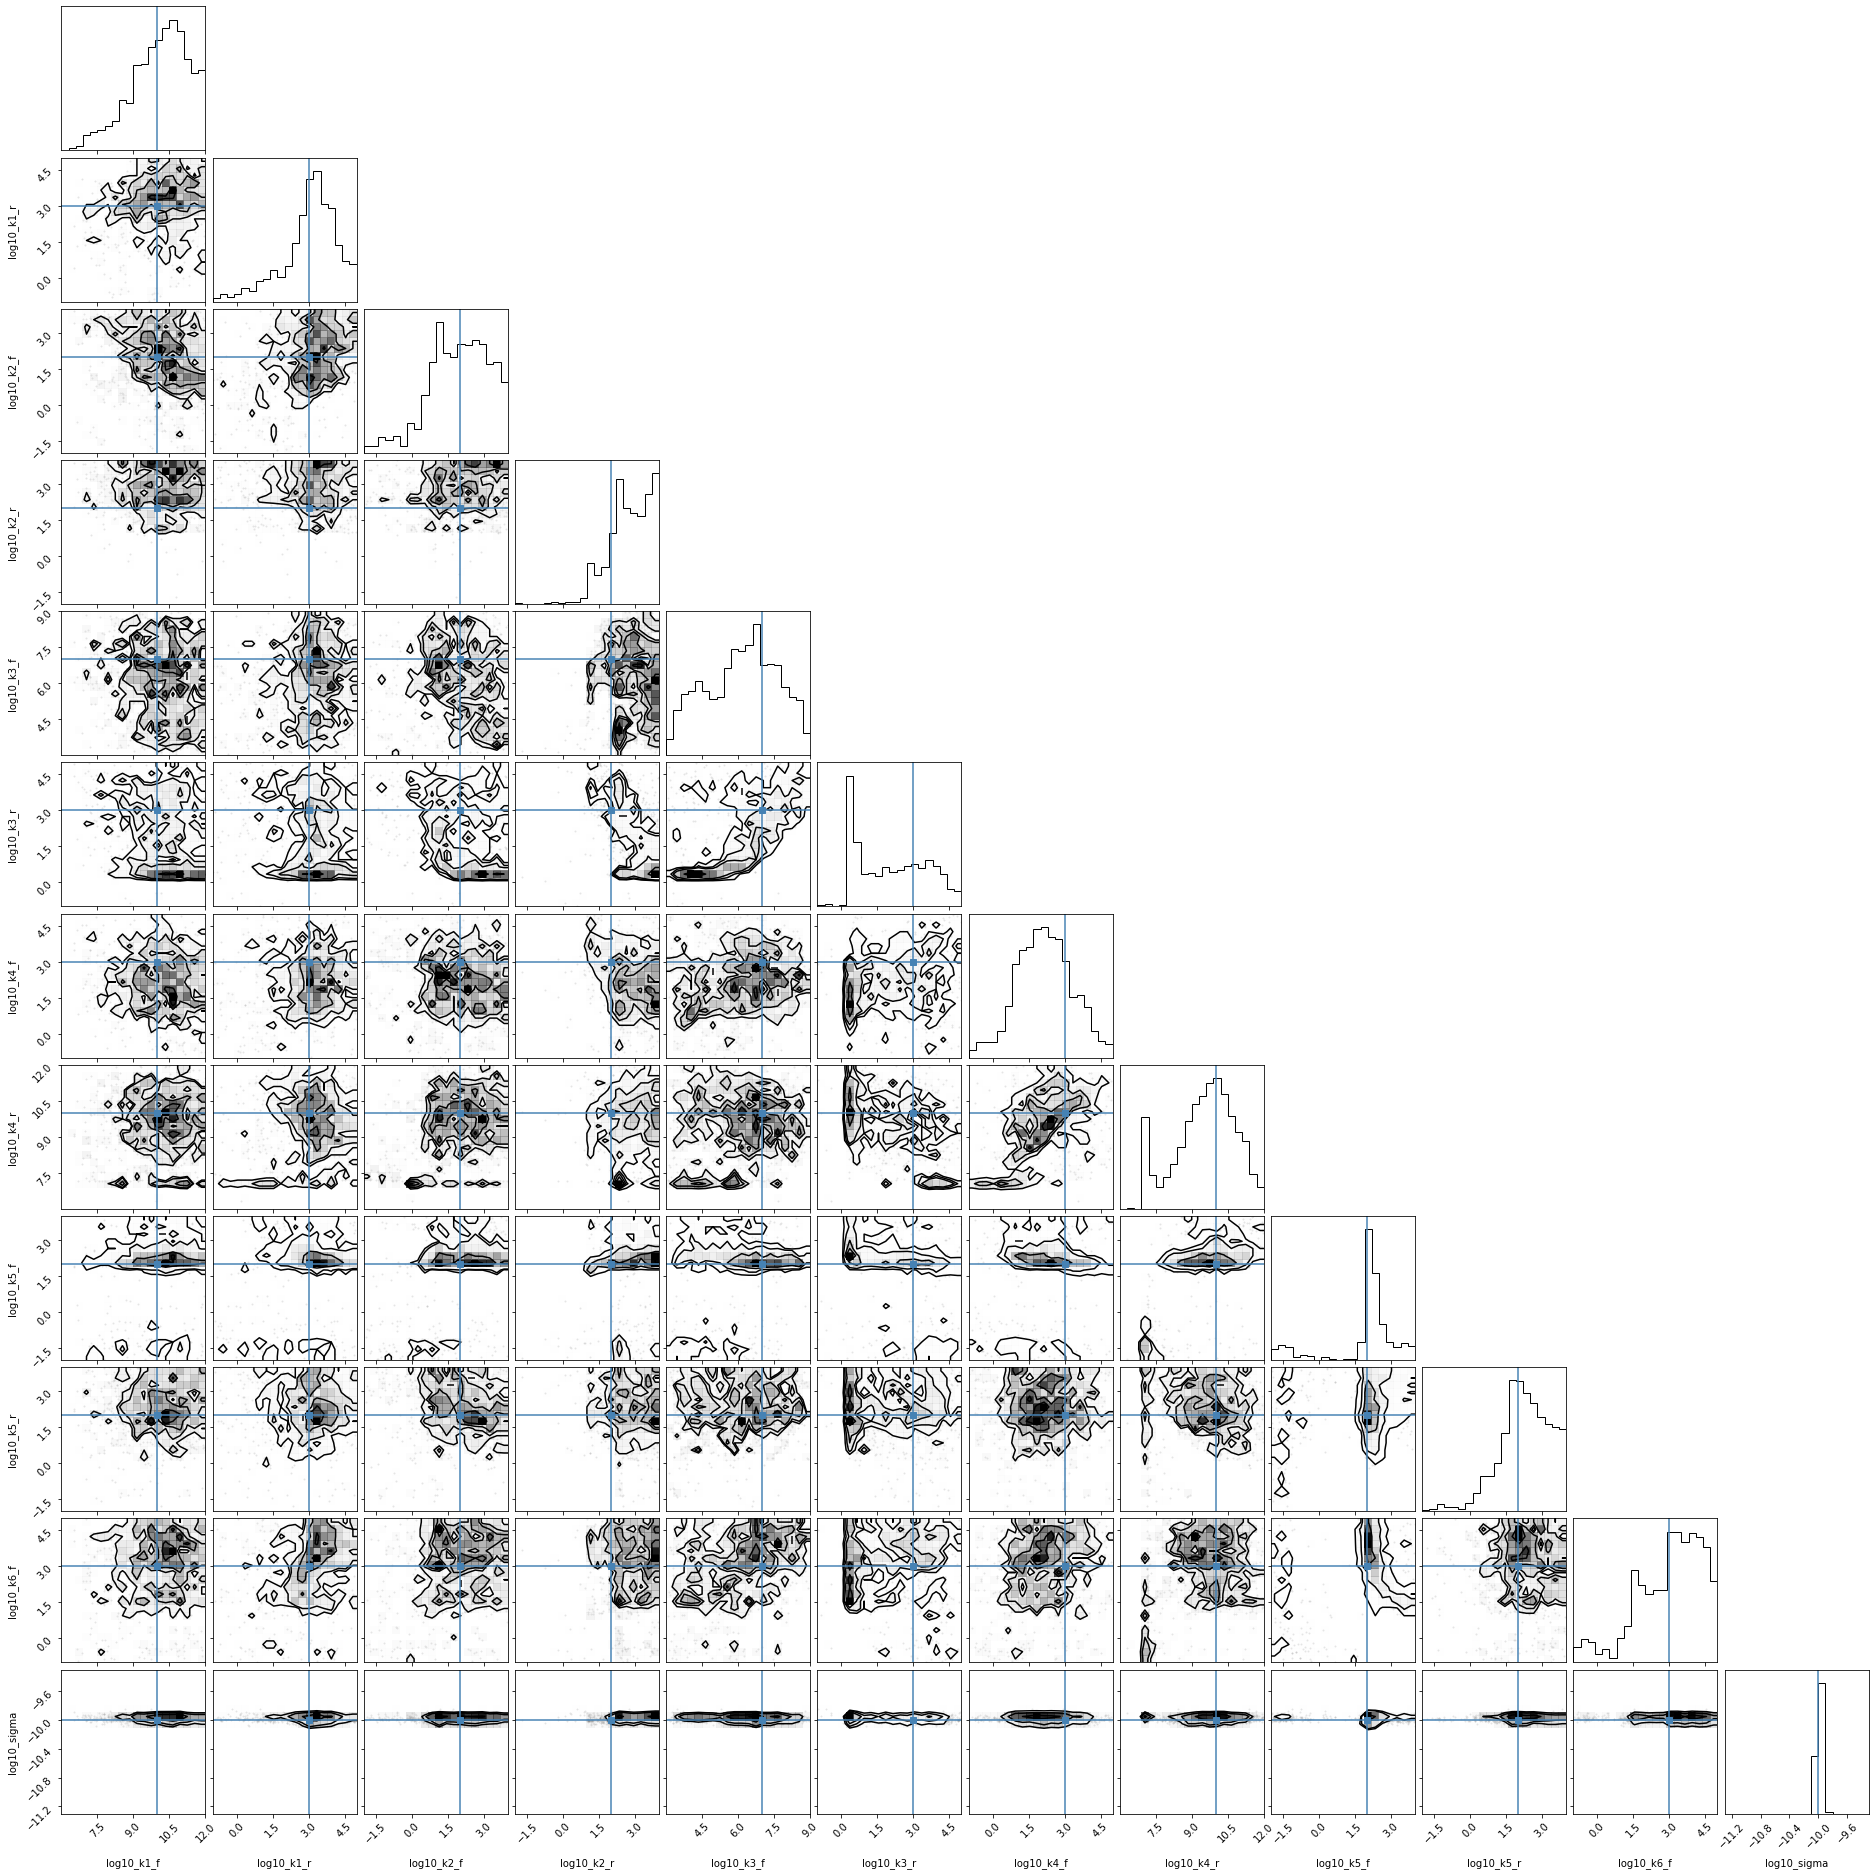

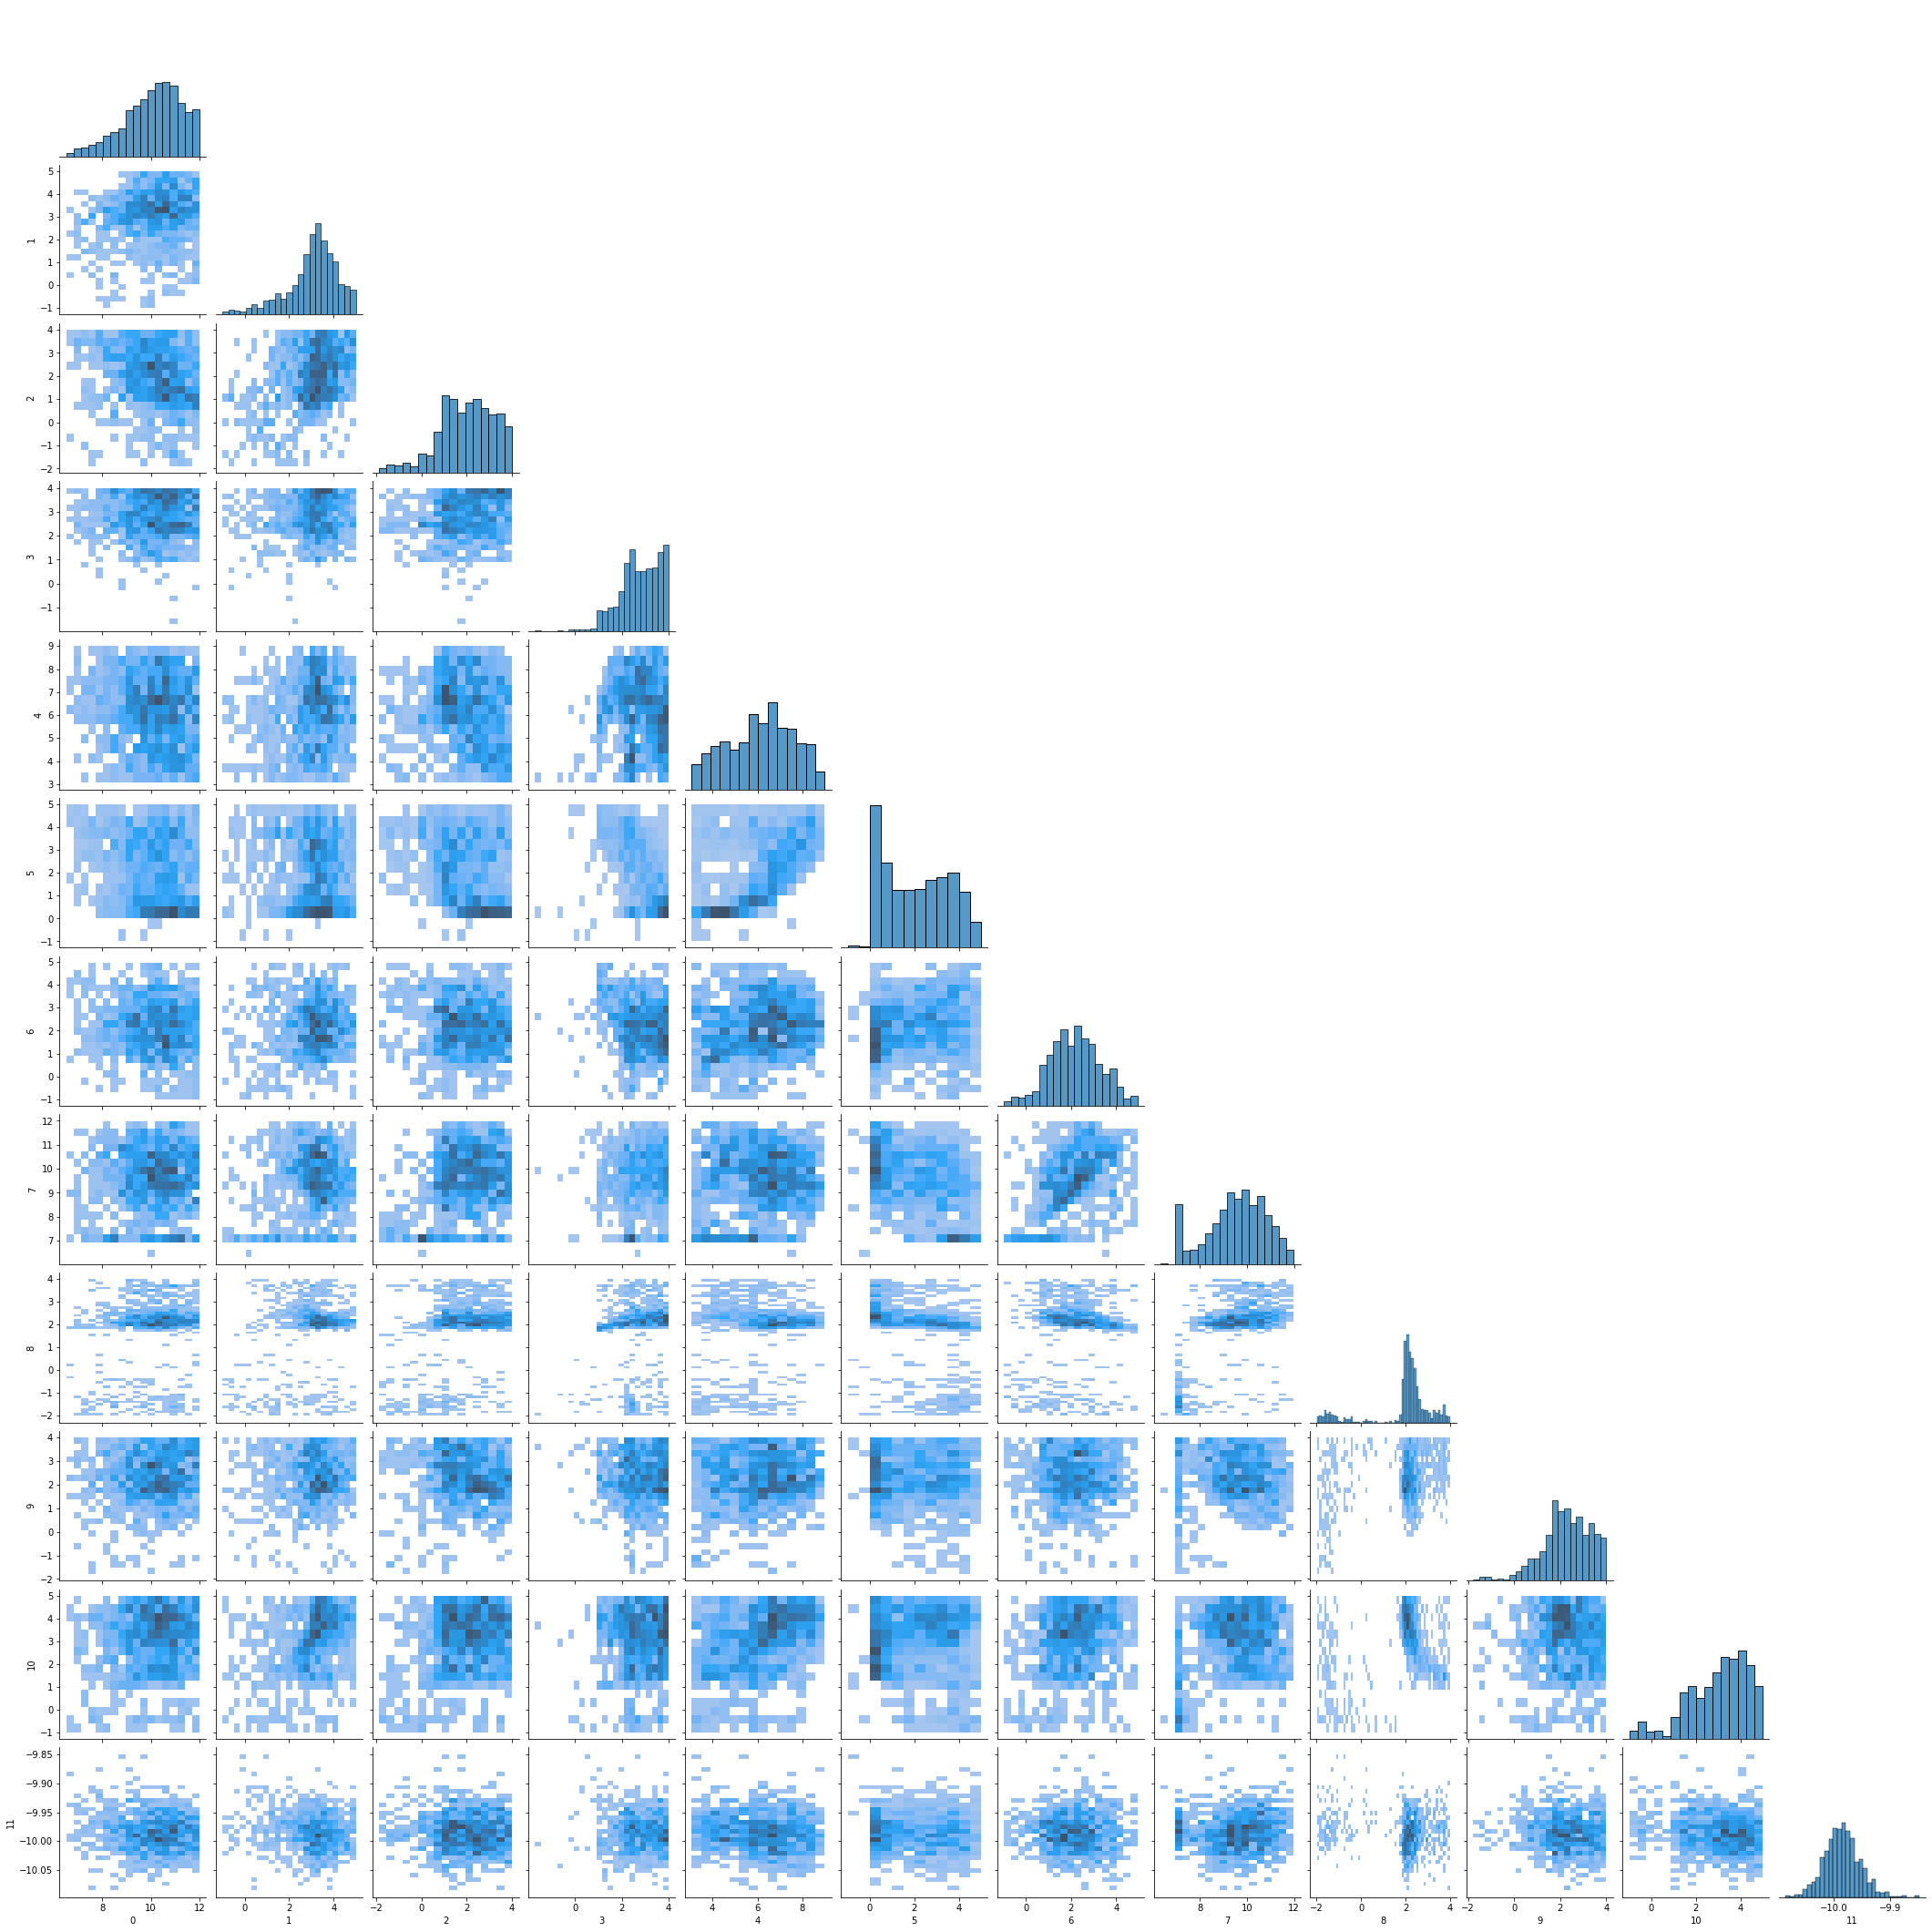

In [12]:
import corner
print(np.shape(params_list[2]))

corner.corner(np.transpose(params_list[2]), range = [(p[1], p[2]) for p in p_list], truths=[p[3] for p in p_list], labels=[p[0] for p in p_list])

import seaborn as sns
import pandas as pd

sns.pairplot(pd.DataFrame(np.transpose(params_list[2])), corner=True, kind='hist')



In [20]:
argmax_logl = np.argmax(logl_list[2])

print(f'max likelihood using differential evolution optimization: {logl_list[2][argmax_logl]}')
print(f'best fit parameter set using differential evolution optimization: {np.transpose(params_list[2])[argmax_logl]}')

max likelihood using differential evolution optimization: 32441.1768234308
best fit parameter set using differential evolution optimization: [  9.78029506   3.35117121   2.36395624   1.20418677   6.65981779
   3.87041271   2.08912872   8.51966452   1.87063971   2.13440094
   3.26617998 -10.00669722]


(6656, 12)
(6656, 12)


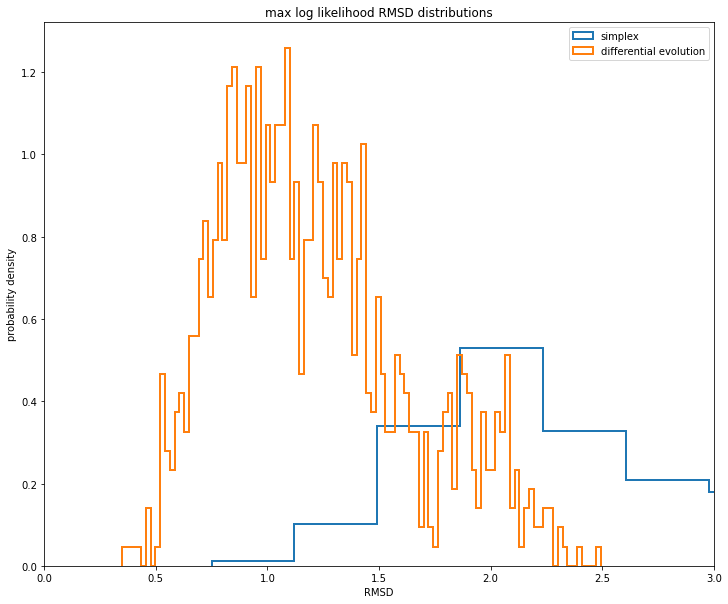

In [55]:
A_simp = np.transpose(params_list[0])
A_DE = np.transpose(params_list[2])


B_simp = np.array([p_ref for _ in range(len(logl_list[0]))])
B_DE = np.array([p_ref for _ in range(len(logl_list[2]))])

RMSD_simp = np.sqrt(np.mean(np.square(A_simp-B_simp), axis=1))
RMSD_DE = np.sqrt(np.mean(np.square(A_DE-B_DE), axis=1))

print(np.shape(A_simp))
print(np.shape(B_simp))

plt.figure(figsize=(12,10))
plt.title('max log likelihood RMSD distributions')
plt.ylabel('probability density')
plt.xlabel('RMSD')
plt.hist(RMSD_simp, density=True, bins=100, histtype='step', label='simplex', lw=2)
plt.hist(RMSD_DE, density=True, bins=100, histtype='step', label='differential evolution', lw=2)
plt.legend()
plt.xlim(0,3)
plt.show()


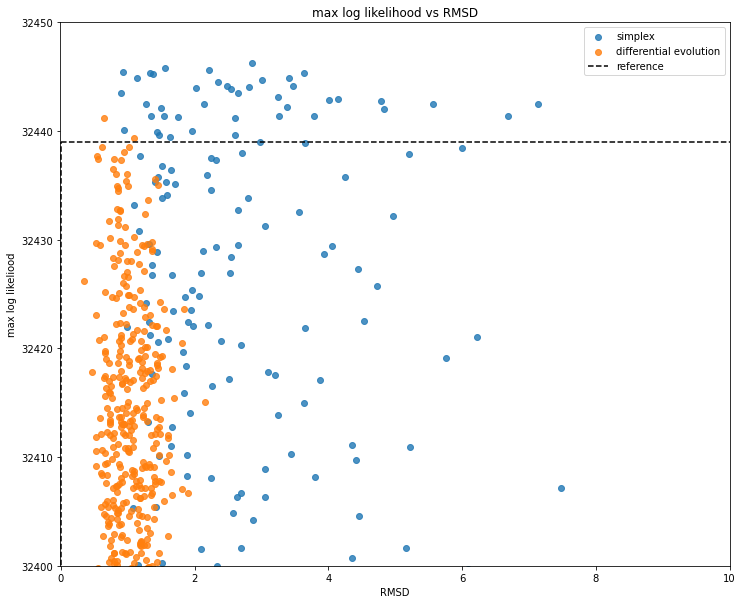

In [105]:
plt.figure(figsize=(12,10))
plt.title('max log likelihood vs RMSD')
plt.ylabel('max log likeliood')
plt.xlabel('RMSD')
plt.scatter(RMSD_simp, logl_list[0], alpha=0.8, label='simplex')
plt.scatter(RMSD_DE, logl_list[2], alpha=0.8, label='differential evolution')
plt.vlines(0, 27000, 32439, ls='--', color='black')
plt.hlines(32439,0,30, ls='--', color='black', label='reference')
plt.xlim(-0.01,10)
plt.ylim(32400,32450)

plt.legend()
plt.show()



[ 7.32942383 -0.82016492  4.0095724  -0.62167574  7.04159436  4.81227539
  0.93543857 10.86475555  2.85638412  3.86678711 -0.88766908]
[ 7.8104108  -0.76183383 -0.15094907  0.67738514  6.78671798 -0.85175295
 -0.37338563 11.70630398  2.12309941  1.86136862 -0.39963275]
[11.80253107  5.32022695  0.0172912   3.22326191  7.37782637  3.5713871
 -0.13237088  7.15640858 -1.74988283  0.75986382  2.72194831]
[ 9.51504687  2.21750692  3.99191514 -1.13973763  6.18489757 -0.40945391
  2.52722173  5.76463217  5.28752696 -0.72321228  4.08796733]
[10.48657226 -0.57166372 -1.95586983  1.63665094  9.48763387  8.8810259
  4.80289268 10.57295958  1.98234821  0.25692632  4.65916569]
[ 7.9502349   3.00852662  0.56116856 -3.14180952  5.21042935  0.83887635
  6.46604495 -2.07159803  3.51738125  2.72051471  3.29549749]
[ 9.18245842  1.32931722 -0.35315765  2.968635    5.75941838 -0.5756063
  1.53966757 10.17404738 -0.90734246  0.36423375  1.71991421]
[ 9.15826101  5.00793174  0.87466619 -0.8610437   4.063678

Error: CVODE Error: CV_TOO_MUCH_WORK, Module: CVODES, Function: CVode, Message: At t = 1.00137, mxstep steps taken before reaching tout.


[22.57658028  0.30969908  0.75525142  0.28577642 10.56842043  9.81884698
  0.34816935  8.27286779 -1.36485679  4.72369554 -0.33650828]
[ 8.71177905  0.24372864 -0.26777853  3.78402222  7.46222684  3.63761876
  0.06681055  7.14728333  2.02737523  3.84914346 -0.5217675 ]
[10.32984452  1.78404677 -0.53898098 -0.57164966  6.13872295 -0.03092576
  0.52565683 11.06088407  1.69260027  3.09013307  1.7482756 ]
[10.28700395  2.30134153  3.20553685 -0.20939026  7.31688954  0.46832104
  3.57657271 10.85974968 -0.33263686  0.83240844  0.03008945]
[ 8.95305473 -0.42765658  8.31101633  7.41818506  3.1525464   0.07378146
  0.63173634 -0.43128429  5.89004769  0.08308641 -1.93386524]
[ 6.21349668  4.18962062 -0.83208908  0.1383226   8.6810503   3.6027259
  2.66481051  6.33079222  4.87765424 -1.01126005  2.28433284]
[11.90198557  6.26248238  2.85855168  3.55095769  7.05161941  1.52219286
  1.34669978  7.96542717  3.83421989  2.38632543  1.14160635]
[-3.24804833e+00 -3.20082781e-01  5.32841377e-03  6.0781

Error: CVODE Error: CV_ERR_FAILURE, Module: CVODES, Function: CVode, Message: At t = 1 and h = 1.79875e-23, the error test failed repeatedly or with |h| = hmin.


[10.70471512  2.01104185  0.09211555  0.07256272  2.68923369  3.79998521
 -0.64660749 19.68454553  0.48128995  1.43713504  1.57570009]
[13.21658022 -0.96925125  0.26687853  0.61442688  4.96119437  2.83468002
  2.16232622 11.03724338 -1.76062859  4.071791    3.79714272]
[ 6.01686716  1.47914782  1.63577995  4.21192364  6.71399394  1.69345046
  5.51784625 14.19962294  1.63687628  0.20119527  1.90614109]
[ 4.05275683e+00  5.76960777e+00  2.41266693e+00 -6.23699821e-01
  3.28259326e+00  5.21570788e-02  2.09255605e+00  2.09111139e+01
 -1.20630239e-01 -5.77502712e-03  2.40658117e+00]
[ 5.92285014  0.55240225  2.71315854  0.31674566  2.03573937  0.12149782
  0.67552895  2.85427642  4.93257023 -1.28665663  7.77908707]
[ 1.10411856e+01  3.78083641e-04  3.21251659e-01  1.02964745e+00
  5.45983091e+00  7.66419120e-02  5.75181467e-01  6.68022884e+00
  2.84888131e+00  4.24121997e+00 -8.86552582e-01]
[11.62360059  1.50501948  2.07633319  5.77112622 -0.05164901 -0.70998453
 -0.37383498 -6.79580623  1

Error: CVODE Error: CV_TOO_MUCH_WORK, Module: CVODES, Function: CVode, Message: At t = 1.01595, mxstep steps taken before reaching tout.


[ 9.92269706  3.2868714   0.67491646  1.35316497  3.97119451  0.79880927
  0.83742434 10.03903907  0.71571351  2.7974694   0.04425591]
[ 8.21272377  5.80420491 -0.49607669 -1.54148786  6.65060004  0.61413244
  8.94640998 -1.6119273   1.29657972  0.70061775  2.29622221]
[ 5.4633386   3.52076564  2.66190702 -0.3054917   8.45216916  3.86537697
  3.01005309  3.02233114  3.966933    1.54070915 -0.2177642 ]
[ 3.25206941 -0.93701304  0.4841353   1.50540615  8.63455736  1.72735406
  6.08558926  1.86629111  4.9614398   1.3166439   5.19533868]
[ 7.54527809  4.83065784  2.89375178 -1.40659583  7.42898359  0.39283022
  3.67632791 12.27335563  2.8762634   0.85579036  1.73773046]
[14.06157443 -0.16968315  0.42056461  0.3162349   1.35459896  1.53149256
  1.39823082 21.03418874  0.93487065 -3.16641    -0.84295278]
[ 6.9821252   3.08902162  1.59314057  3.11490368  9.1238619   1.54249669
  3.29141116 10.91383306 -0.57328709  3.54021607  1.45422878]
[ 7.62793509 -0.54638513  1.23501647  0.77072709  8.409

Error: CVODE Error: CV_ERR_FAILURE, Module: CVODES, Function: CVode, Message: At t = 1 and h = 8.07875e-29, the error test failed repeatedly or with |h| = hmin.


[ 8.82553528 -0.02476583  2.46438862 -1.31986928  8.5368109   1.90208413
  1.82016125 12.197201    4.06947348  2.84391027  4.02649058]
[ 8.89349326 -0.41015108  0.71705686 -1.80026294  7.1106293   3.69463981
 -0.46817934 10.7705538   3.17645707  1.47542961  0.8143329 ]
[ 9.75607209  1.31816567  3.03183413 -1.30870342  6.267318    4.00524103
  3.4640614  10.7600417   0.75134539  1.03452798  4.71639616]
[10.808595    3.60055931  3.48358359  1.40826947  4.57131651 -0.28178502
 -0.16557956 12.68529214  3.04898598  2.6945392   2.34093982]
[ 9.38614475 -1.51091255  0.63064122  2.59597461  5.19580337  5.37260477
  2.04665666  7.05947794 -1.4455388  -0.66166807  4.72194611]
[ 7.76859058 -0.5385777   1.24730347  3.65934528  8.38072646 -0.1777302
  4.5495895  11.7457387   2.51234964  1.3246925   3.18371618]
[18.26674956  1.40463425  1.03351713  2.33671236  7.71986043  6.47077352
 -0.09410945  7.15198928 -1.73186143  7.46345376 14.75320604]
[-3.64877567  1.94147844  1.24136529 -0.23737175  8.2688

Error: CVODE Error: CV_ERR_FAILURE, Module: CVODES, Function: CVode, Message: At t = 1 and h = 2.63332e-24, the error test failed repeatedly or with |h| = hmin.


[10.40585899  3.02572328  1.07160624  1.74195806  4.14647202  0.1569479
  9.62146815 11.31812897 -1.24250887  0.12278116  3.41027565]
[ 9.10298177  0.42390996 -1.26964487  1.23361108  6.4104391   1.05079412
  1.32555118  6.90964189 -1.44258221 -0.93293015  0.45083041]
[17.31920475 12.72464523 -0.12404867 -1.12626492 10.49815016 -1.23673498
  1.58339477  3.06751858 -1.02864696 13.59343252  1.94522768]
[ 6.86664811  3.96513134 -1.39875389 -1.06244621  3.10549762  3.9034382
  2.23268502  9.82594493 -1.2499519   2.9328696   2.55964532]
[ 4.58135551 -1.67589791 -1.41152576  0.08515954  5.43332972  0.52931531
  1.85235631  4.11002874  5.19091623 -0.92536441 -0.01677626]
[10.66479539  0.05628866 -0.56285293  1.36360694  5.80325015  0.24029529
  2.43568136  9.59927535 -1.26584666  1.18694822  2.42580563]
[ 8.60480783  7.94555371 -2.79606634  0.07205525 13.89082904  0.19902424
  0.62287452 -2.7352727   8.36607082  0.20522414  0.23979557]
[ 8.94411185  0.02192796  7.32850805 -1.20949814  6.12496

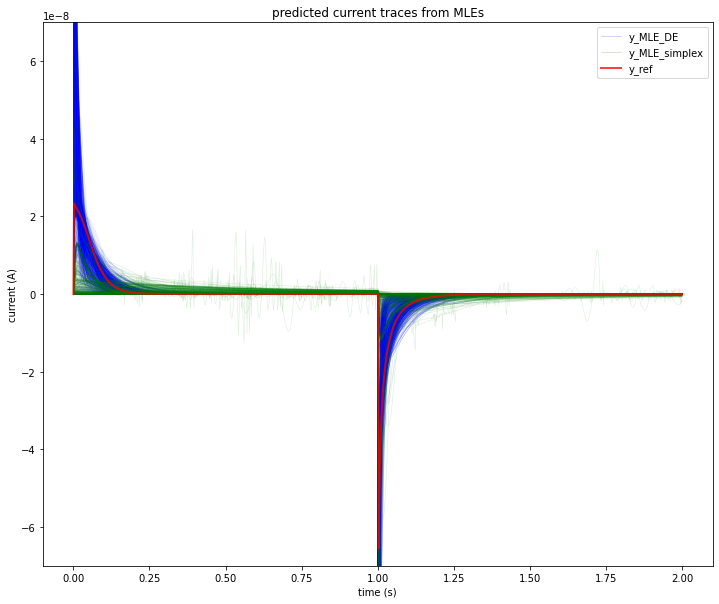

In [103]:
import roadrunner 

def run_synthetic_ssme_assay(rr: roadrunner.RoadRunner, n_points: int, k_values:list):
    '''perform a synthetic solid-supported membrane electrophysiology assay'''
    m = rr
    t_stage = 1
    n_pts_per_stage = n_points #60

    H_out_sequence = [1e-7,5e-7,1e-7]  # fixed buffer solutions for ion, for n stages (e.g. 3 stages)
    S_out_sequence = [1e-3,1e-3,1e-3]  # fixed buffer solutions for substate, for n stages (e.g. 3 stages)
    buffer_solution_sequence = zip(H_out_sequence, S_out_sequence)

    m.resetToOrigin()
    m.integrator.absolute_tolerance = 1e-22
    m.integrator.relative_tolerance = 1e-12
    # m.conservedMoietyAnalysis = True
    k_dict = {
        'k1_f' : 10**k_values[0],
        'k1_r' : 10**k_values[1],
        'k2_f' : 10**k_values[2],
        'k2_r' : 10**k_values[3],
        'k3_f' : 10**k_values[4],
        'k3_r' : 10**k_values[5],
        'k4_f' : 10**k_values[6],
        'k4_r' : 10**k_values[7],
        'k5_f' : 10**k_values[8],
        'k5_r' : 10**k_values[9],
        'k6_f' : 10**k_values[10],
    }

    for k in k_dict:
        setattr(m, k, k_dict[k])


    test_labels = ['OF', 'OF_Hb', 'IF_Hb', 'IF_Hb_Sb', 'IF_Sb', 'OF_Sb',
                   'H_out', 'H_in', 'S_out', 'S_in'
    ]

    selections = ['time', 'current', 'OF', 'OF_Hb', 'IF_Hb', 'IF_Hb_Sb', 'IF_Sb', 'OF_Sb',
                   'H_out', 'H_in', 'S_out', 'S_in']
    results = []

    for i, solution in enumerate(buffer_solution_sequence):
        
        # set buffer solution
        setattr(m, 'H_out', solution[0])
        setattr(m, 'S_out', solution[1])

        # initialize other concentrations --> check here, something weird w/ concentrations and ouput
        if i==0:
            setattr(m, 'OF', 0.0011694210430300167)
            setattr(m, 'OF_Hb', 0.0)
            setattr(m, 'IF_Hb', 0.0)
            setattr(m, 'IF_Hb_Sb', 0.0)
            setattr(m, 'IF_Sb', 0.0)
            setattr(m, 'OF_Sb', 0.0)
            setattr(m, 'H_in', 1e-7)
            setattr(m, 'S_in', 1e-3)
            # for label in test_labels:
            #     print(getattr(m, label))
            m.simulate(i,i+t_stage,n_pts_per_stage, selections=selections)
            # rr.steadyStateSelectionss =ss_labels
            # ss_values = rr.getSteadyStateValues()
            # for j, ss_label in enumerate(ss_labels):
            #     setattr(m, ss_label, ss_values[j])
        else:
            results.append(m.simulate(i,i+t_stage,n_pts_per_stage, selections=selections))

        # for label in test_labels:
        #     print(getattr(m, label))
        # print('----------')
        

        # results.append(m.simulate(i,i+t_stage,n_pts_per_stage, selections=selections))
        # if i ==0:
        #     print(results)
        #results.append(m.simulate(0,1,n_pts_per_stage, selections=selections))
    #print('\n')
    return np.vstack(results).T

np.random.seed(0)
k_ref = p_ref[:-1]
n_points = 500
sbmlfile = '/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/scratch/antiporter_12D_model_3c_no_events.xml'
rr = roadrunner.RoadRunner(sbmlfile)

y_true = run_synthetic_ssme_assay(rr, n_points, k_ref)[1]
y_obs = y_true + np.random.normal(0,10**p_ref[-1], np.size(y_true))
t = np.linspace(0,2,np.size(y_obs))

plt.figure(figsize=(12,10))
plt.title('predicted current traces from MLEs')
plt.ylabel('current (A)')
plt.xlabel('time (s)')




DE_param_samples = np.transpose(params_list[2])[np.random.choice(range(len(np.transpose(params_list[2]))), size=1000, replace=False)]
simplex_param_samples = np.transpose(params_list[0])[np.random.choice(range(len(np.transpose(params_list[0]))), size=1000, replace=False)]

for i, param_set in enumerate(DE_param_samples):
    k_temp = param_set[:-1]
    sigma_temp = param_set[-1]
    y_tmp = run_synthetic_ssme_assay(rr, n_points, k_temp)[1]
    y_obs_tmp = y_true + np.random.normal(0,10**sigma_temp, np.size(y_tmp))
    if i == 0:
        plt.plot(t, y_tmp, lw=0.5, color='blue', label='y_MLE_DE', alpha=0.35)
        
        #plt.plot(t, y_tmp, lw=2,  color='orange', label='y_MLE_DE+noise', alpha=0.75)
    else:
        plt.plot(t, y_tmp, lw=0.5, color='blue', alpha=0.15)
        
        #plt.plot(t, y_tmp, lw=1,  color='orange', alpha=0.75)

for i, param_set in enumerate(simplex_param_samples):
    k_temp = param_set[:-1]
    sigma_temp = param_set[-1]
    print(k_temp)
    try:
        y_tmp = run_synthetic_ssme_assay(rr, n_points, k_temp)[1]
        y_obs_tmp = y_true + np.random.normal(0,10**sigma_temp, np.size(y_tmp))
        if i ==0:
            plt.plot(t, y_tmp, lw=0.5, color='green', label='y_MLE_simplex', alpha=0.35)
        else:
            plt.plot(t, y_tmp, lw=0.5, color='green', alpha=0.15)
    except:
        pass

plt.plot(t, y_true, lw=2, color='red', label='y_ref', alpha=0.75)
#plt.plot(t, y_obs, lw=2,  color='black', label='y_ref+noise', alpha=0.75)
plt.ylim(-7e-8,7e-8)
plt.legend()
plt.show()


2.861937918105345
[11.78176845  4.84093166  0.99630239  0.99146296  2.97272319  0.04012018
  2.28280014  9.45184095  2.1751925  -3.72930717 -2.57220945]
[ 11.78176845   4.84093166   0.99630239   0.99146296   2.97272319
   0.04012018   2.28280014   9.45184095   2.1751925   -3.72930717
  -2.57220945 -10.01036405]
32446.285672229475


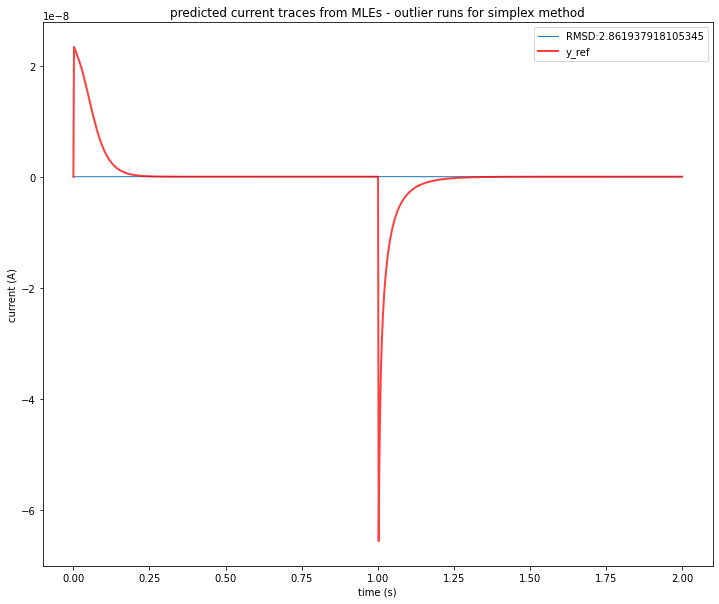

: 

In [132]:
arg_sort_simplex = np.argsort(logl_list[0])[::-1]

plt.figure(figsize=(12,10))
plt.title('predicted current traces from MLEs - outlier runs for simplex method')
plt.ylabel('current (A)')
plt.xlabel('time (s)')


for i in range(1):
    p_temp = np.transpose(params_list[0])[arg_sort_simplex[i]]
    k_temp = p_temp[:-1]
    sigma_temp = p_temp[-1]

    RMSD_temp = np.sqrt(np.mean(np.square(p_temp-p_ref), axis=0))
    print(RMSD_temp)
    print(k_temp)
    print(p_temp)
    print(logl_list[0][arg_sort_simplex[i]])
    
    y_temp = run_synthetic_ssme_assay(rr, n_points, k_temp)[1]
    y_obs_temp = y_true + np.random.normal(0,10**sigma_temp, np.size(y_tmp))
   
    plt.plot(t, y_temp, lw=1, label=f'RMSD:{RMSD_temp}')


plt.plot(t, y_true, lw=2, color='red', label='y_ref', alpha=0.75)
plt.legend()
plt.show()
    